In [1]:
import os
import datetime
import math
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import ewtpy

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
# DATA
df1 = pd.read_csv('data_day.csv')
df2 = pd.read_csv('data_2018-08-05_2021-04-30.csv')
df3 = pd.read_csv('data_2018-05-05_2018-08-04.csv')
df4 = pd.read_csv('data_2015-08-09_2018-05-04.csv')
df5 = pd.read_csv('data_2013-02-12_2015-08-08.csv')
df6 = pd.read_csv('data_2010-05-19_to_2013-02-11.csv')
df7 = pd.read_csv('data_2007-08-23_to_2010-05-18.csv')
df8 = pd.read_csv('data_2004-11-26_to_2007-08-22.csv')
df = pd.concat([df6, df5, df4, df3, df2, df1])
df.index = range(0,4996)
df.tail()

date_time = pd.concat([pd.to_datetime(df['datetime'][0:4000]),pd.to_datetime(df['datetime'][4000:])])
data_use = df[['temp','tempmax', 'tempmin','humidity', 'precip', 'windspeed', 'solarradiation', 'solarenergy']]
print(data_use)

      temp  tempmax  tempmin  humidity  precip  windspeed  solarradiation  \
0     30.8     36.5     26.0      78.1   0.000       20.5           301.4   
1     31.3     36.4     27.0      76.0   0.300       24.1           281.5   
2     30.7     39.0     26.0      76.1   2.300       40.7           237.1   
3     31.5     39.6     26.0      71.2   0.800       15.1           296.8   
4     27.6     30.8     25.8      80.1  33.000       22.7           240.8   
...    ...      ...      ...       ...     ...        ...             ...   
4991  20.5     22.0     19.5      93.8   8.794       17.5           148.7   
4992  22.4     26.5     20.0      84.5   0.683       19.4           140.8   
4993  22.6     26.6     20.0      85.5   0.072       20.3           131.9   
4994  23.0     26.0     19.0      82.4   3.300       20.5            63.7   
4995  16.0     18.0     14.0      91.4   3.400       22.3            15.8   

      solarenergy  
0            26.1  
1            24.3  
2            20

In [3]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)
timestamp_s[1] - timestamp_s[0]

86400.0

C:\Users\tridu\AppData\Local\Temp\ipykernel_16172\1206436225.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_use['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
C:\Users\tridu\AppData\Local\Temp\ipykernel_16172\1206436225.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_use['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))


Index(['temp', 'tempmax', 'tempmin', 'humidity', 'precip', 'windspeed',
       'solarradiation', 'solarenergy', 'Year sin', 'Year cos'],
      dtype='object')

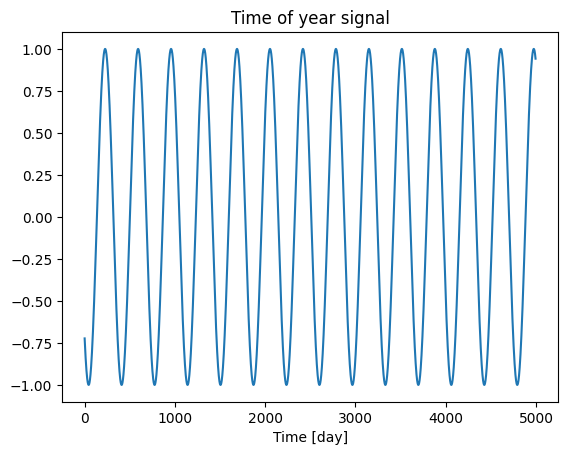

In [4]:
# PERIOD TIME

day = 24*60*60
year = (365.2425)*day
# df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
# df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
data_use['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
data_use['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

# plt.plot(np.array(df['Year sin'])[:366])
plt.plot(np.array(data_use['Year cos'])[:])
plt.xlabel('Time [day]')
plt.title('Time of year signal')
data_use.columns

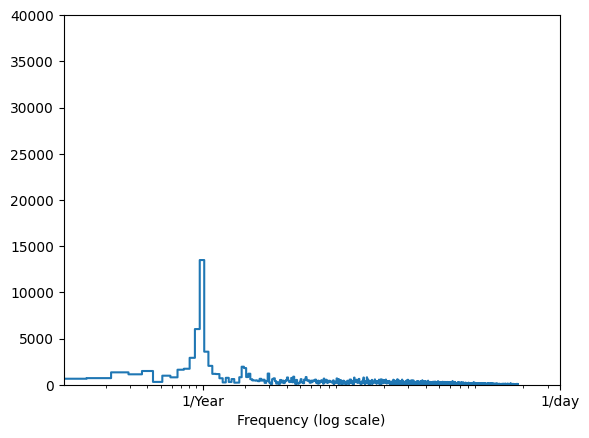

In [5]:
fft = tf.signal.rfft(data_use['temp'])
f_per_dataset = np.arange(0, len(fft))

n_samples_day = len(data_use['humidity'])
days_per_year = 365.2524
years_per_dataset = n_samples_day/(days_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 40000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

In [6]:
def decompose_to_ewt(data):
    temp_data,  mfb ,boundaries = ewtpy.EWT1D(data, N = 8)
    return temp_data, mfb, boundaries
def split_mode(ewt):
    modes = [[],[],[],[],[]]
    for i in range(8):
        modes[i] = [m for m in ewt[:,i]]
    return modes

(4996, 8)


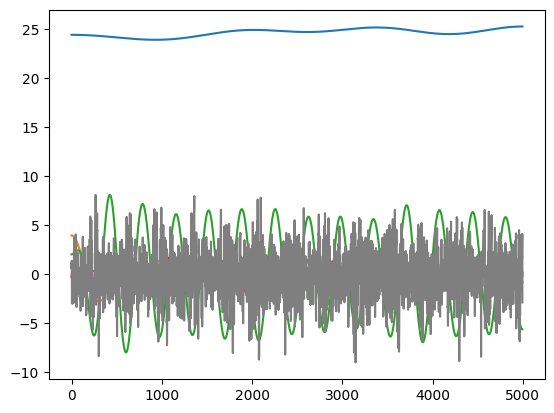

In [7]:
temp_ewt,_,_ = decompose_to_ewt(data_use['temp'])
plt.plot(temp_ewt)
print(temp_ewt.shape) 

In [8]:
temp_ewt_transpose = np.transpose(temp_ewt)
for i in range(8):
    data_use['temp_ewt'+str(i)] = temp_ewt_transpose[i]

C:\Users\tridu\AppData\Local\Temp\ipykernel_16172\1592067542.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_use['temp_ewt'+str(i)] = temp_ewt_transpose[i]
C:\Users\tridu\AppData\Local\Temp\ipykernel_16172\1592067542.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_use['temp_ewt'+str(i)] = temp_ewt_transpose[i]
C:\Users\tridu\AppData\Local\Temp\ipykernel_16172\1592067542.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [9]:
data_use.columns

Index(['temp', 'tempmax', 'tempmin', 'humidity', 'precip', 'windspeed',
       'solarradiation', 'solarenergy', 'Year sin', 'Year cos', 'temp_ewt0',
       'temp_ewt1', 'temp_ewt2', 'temp_ewt3', 'temp_ewt4', 'temp_ewt5',
       'temp_ewt6', 'temp_ewt7'],
      dtype='object')

In [10]:
number_train = int(data_use.shape[0] * 0.8)
train, test = data_use[0:number_train], data_use[number_train:]

In [12]:
def create_data(in_steps, out_steps, data, features):
    X = []
    y = []
    for i in range(len(data)-in_steps-out_steps):
        X.append(data[i:i+in_steps])
        y.append(data[i+in_steps:i+in_steps+out_steps][features])
    return np.array(X), np.array(y)
def normalize(data, train_mean, train_std):
    data_norm = (data - train_mean)/train_std
    return data_norm
def unnormalize(data, train_mean, train_std):
    data_unnorm = (data * train_std) + train_mean
    return data_unnorm


In [88]:
in_steps = 365
out_steps = 7
features_train = ['temp']
num_features = len(features_train) 

In [89]:
X_train, y_train = create_data(in_steps, out_steps, train, features_train)
y_train = y_train.reshape(y_train.shape[0], y_train.shape[1], num_features)

X_test, y_test = create_data(in_steps, out_steps, test, features_train)
y_test = y_test.reshape(y_test.shape[0], y_test.shape[1], num_features)

X_train_norm = normalize(X_train, X_train.mean(), X_train.std())
y_train_norm = normalize(y_train, y_train.mean(), y_train.std())

X_test_norm = normalize(X_test, X_train.mean(), X_train.std())
y_test_norm = normalize(y_test, y_train.mean(), y_train.std())

print(X_train_norm.shape, y_train_norm.shape, X_test_norm.shape, y_test_norm.shape)


(3624, 365, 18) (3624, 7, 1) (628, 365, 18) (628, 7, 1)


In [15]:
print(X_train_norm[:5])

[[[ 0.18634174  0.31043217  0.08184453 ... -0.4883165  -0.4843901
   -0.47001991]
  [ 0.19722687  0.30825515  0.10361478 ... -0.48831159 -0.48438918
   -0.45912166]
  [ 0.18416471  0.3648578   0.08184453 ... -0.48830179 -0.48438734
   -0.47218566]
  ...
  [ 0.03612701  0.08184453 -0.00523647 ... -0.48704463 -0.48538423
   -0.55134685]
  [ 0.05789726  0.16892554 -0.02700672 ... -0.48669236 -0.4854588
   -0.53105755]
  [ 0.08837561  0.19504984 -0.00523647 ... -0.48633474 -0.48553101
   -0.50353284]]

 [[ 0.19722687  0.30825515  0.10361478 ... -0.48831159 -0.48438918
   -0.45912166]
  [ 0.18416471  0.3648578   0.08184453 ... -0.48830179 -0.48438734
   -0.47218566]
  [ 0.20158092  0.37791995  0.08184453 ... -0.4882871  -0.48438458
   -0.45473014]
  ...
  [ 0.05789726  0.16892554 -0.02700672 ... -0.48669236 -0.4854588
   -0.53105755]
  [ 0.08837561  0.19504984 -0.00523647 ... -0.48633474 -0.48553101
   -0.50353284]
  [ 0.08402156  0.15804041  0.01653378 ... -0.48597236 -0.48560068
   -0.509

In [78]:
print(X_train_norm.shape, y_train_norm.shape, X_test_norm.shape, y_test_norm.shape)

(3809, 180, 18) (3809, 7, 1) (813, 180, 18) (813, 7, 1)


In [1]:
CONV_WIDTH = 5
def lamda_layer(x):
    return x[:, -CONV_WIDTH:, :]
model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(64, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(out_steps*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([out_steps, num_features])
])



NameError: name 'tf' is not defined

In [149]:
model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Lion(learning_rate = 0.001),
)

In [150]:
history = model.fit(X_train_norm, y_train_norm, epochs=30, validation_split=0.2, batch_size=32, validation_batch_size=32)

Epoch 1/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8586 - val_loss: 0.3237
Epoch 2/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3364 - val_loss: 0.2499
Epoch 3/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2586 - val_loss: 0.2137
Epoch 4/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2318 - val_loss: 0.2102
Epoch 5/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2233 - val_loss: 0.1981
Epoch 6/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2111 - val_loss: 0.1968
Epoch 7/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1926 - val_loss: 0.1941
Epoch 8/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1927 - val_loss: 0.1941
Epoch 9/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1994 - val_loss: 0.2051
Epoch 10/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1894 - val_loss: 0.2004
Epoch 11/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1962 - val_loss: 0.1951
Epoch 12/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1958 - val_lo

In [105]:
predict = model.predict(X_test_norm)
print(predict.shape)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
(628, 7, 1)


In [82]:
model.save('CNN-EWT-180.h5')

In [83]:
model_365 = tf.keras.models.load_model('CNN-EWT-180.h5')

ValueError: Sequential model 'sequential_9' has already been configured to use input shape (None, 180, 18). You cannot build it with input_shape [None, 180, 18]

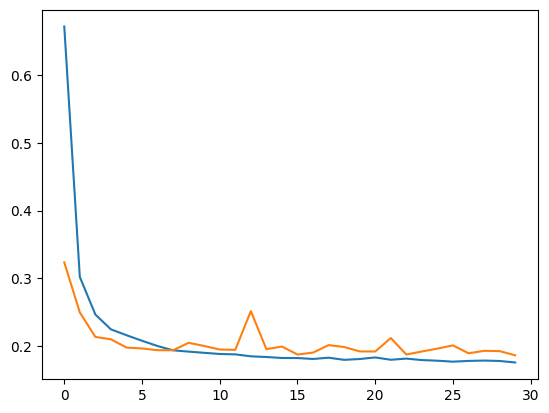

In [151]:
plt.plot(history.history['loss'][:])
plt.plot(history.history['val_loss'][:])

In [152]:
print(model.evaluate(X_test_norm, y_test_norm))
print(model.evaluate(X_test_norm, y_test_norm))

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1674 
0.18929582834243774
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1674 
0.18929582834243774


In [27]:
predict = model.predict(X_test_norm)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [153]:
predict = model.predict(X_test_norm)
feature = 0
predict_unnorm = unnormalize(predict, y_train.mean(), y_train.std())
y_test_unnorm = unnormalize(y_test_norm, y_train.mean(), y_train.std())

predict_unnorm_fix = predict_unnorm[:,:,0]
y_test_unnorm_fix = y_test_unnorm[:,:,0]

save_predict = predict_unnorm
save_y_test = y_test_unnorm

predict_unnorm = predict_unnorm_fix.reshape(predict_unnorm_fix.shape[0], predict_unnorm_fix.shape[1],1)
y_test_unnorm = y_test_unnorm_fix.reshape(y_test_unnorm_fix.shape[0], y_test_unnorm_fix.shape[1],1)

print(predict_unnorm)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
[[[27.86869 ]
  [26.635456]
  [25.971737]
  ...
  [25.347921]
  [25.40196 ]
  [25.544691]]

 [[27.923206]
  [26.857548]
  [26.278044]
  ...
  [25.533276]
  [25.484404]
  [25.602663]]

 [[26.326086]
  [26.014448]
  [26.175558]
  ...
  [25.897955]
  [26.088726]
  [26.243002]]

 ...

 [[16.63803 ]
  [16.631632]
  [16.71639 ]
  ...
  [16.964565]
  [17.120884]
  [17.221893]]

 [[17.52695 ]
  [17.433187]
  [17.218975]
  ...
  [17.09476 ]
  [17.237413]
  [17.322304]]

 [[17.943775]
  [17.73891 ]
  [17.35104 ]
  ...
  [17.112661]
  [17.196753]
  [17.314428]]]


Day:  1
MAE:  1.1516128494481372
MSE:  2.3763223318293334
CORR:  0.9517070116224945
Day:  2
MAE:  1.5881106759332546
MSE:  4.224556671841725
CORR:  0.9033135402579037
Day:  3
MAE:  1.7817815571074274
MSE:  5.368622388562379
CORR:  0.8745027452315814
Day:  4
MAE:  1.8662957082128828
MSE:  5.877464356830615
CORR:  0.8623444579812098
Day:  5
MAE:  1.8993548520811043
MSE:  6.026721324628626
CORR:  0.857770463375274
Day:  6
MAE:  1.9021754601958447
MSE:  6.052622657689788
CORR:  0.8562463982798761
Day:  7
MAE:  1.8650248138767898
MSE:  5.891005450207271
CORR:  0.8602076339301552


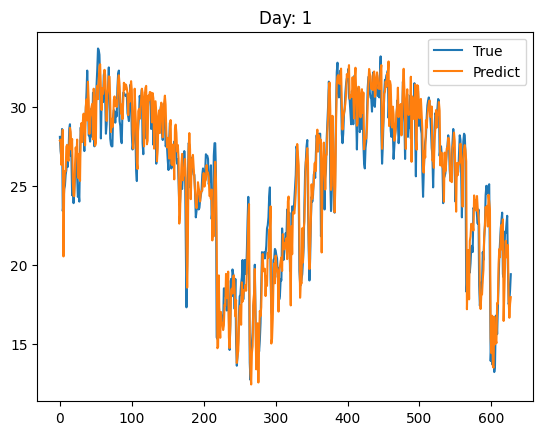

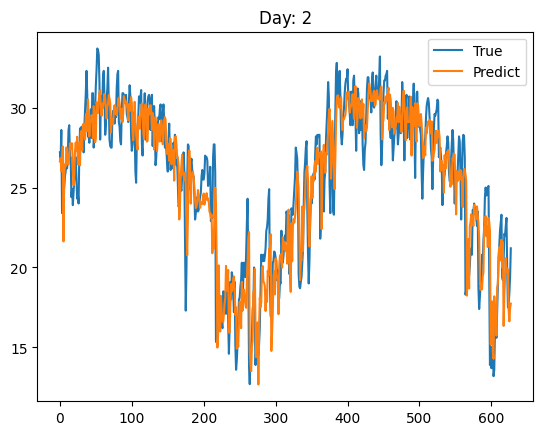

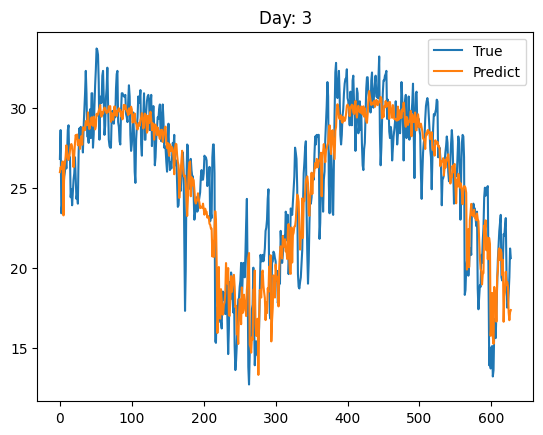

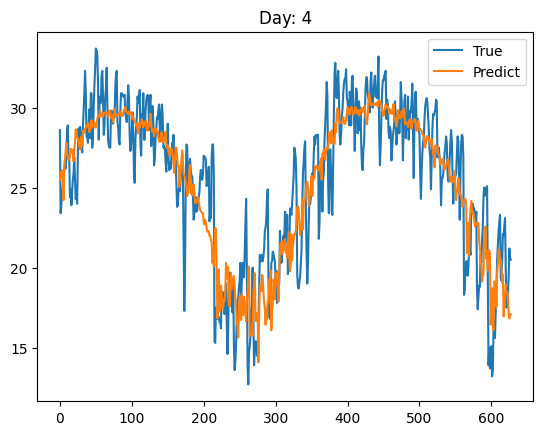

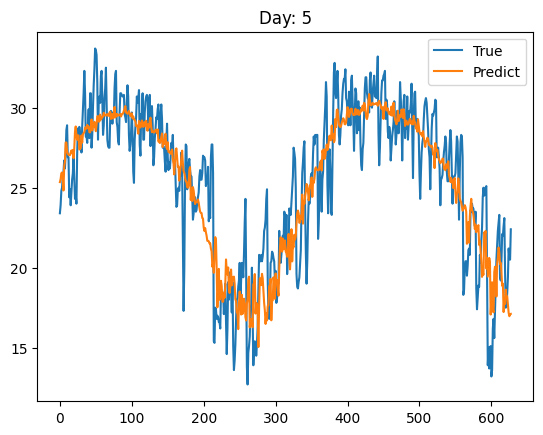

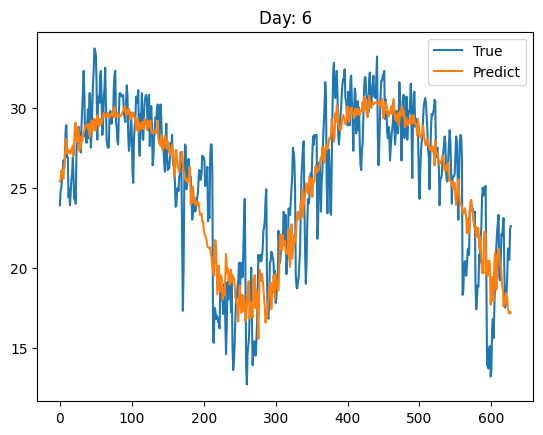

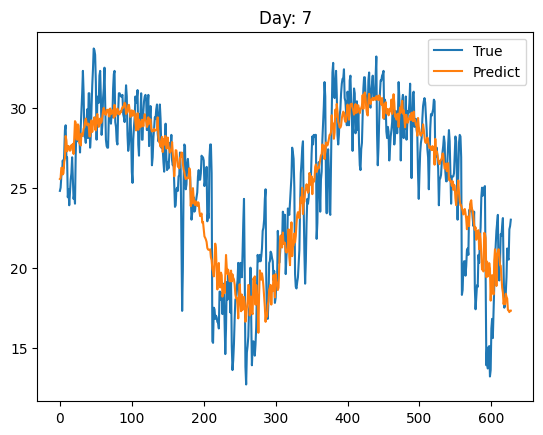

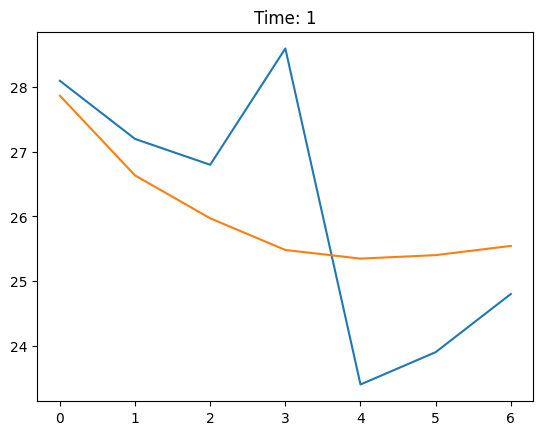

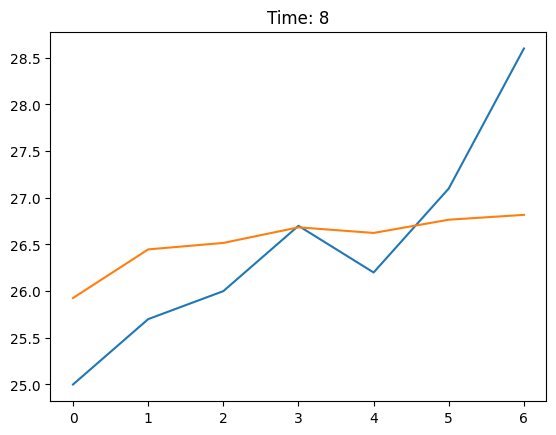

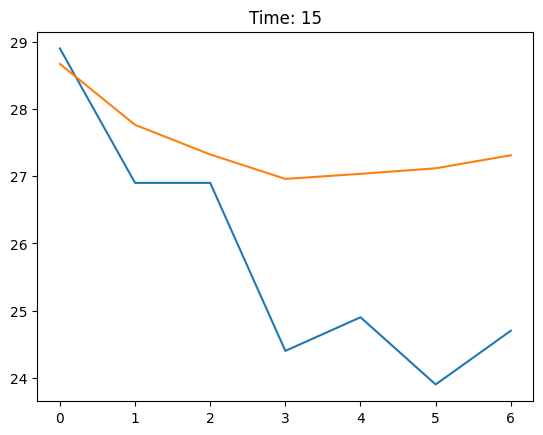

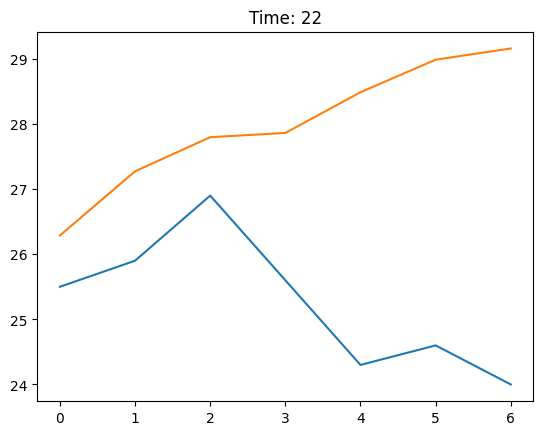

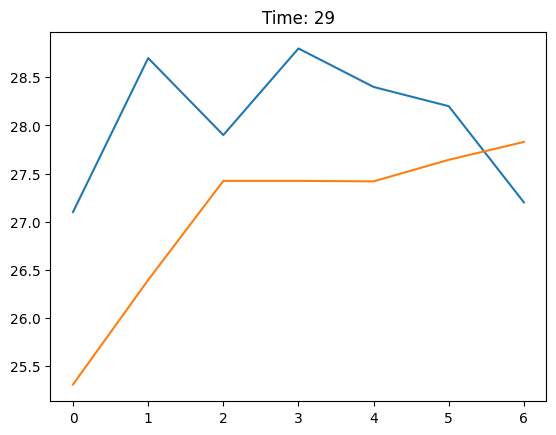

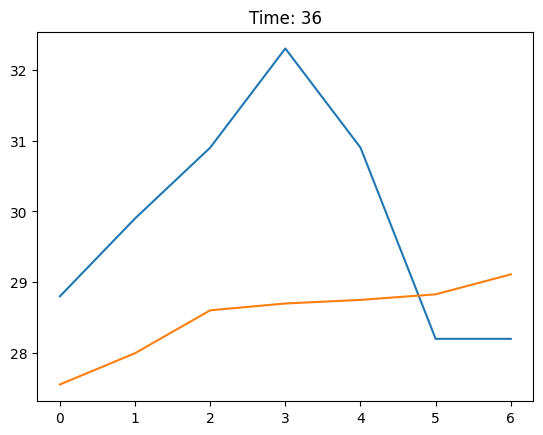

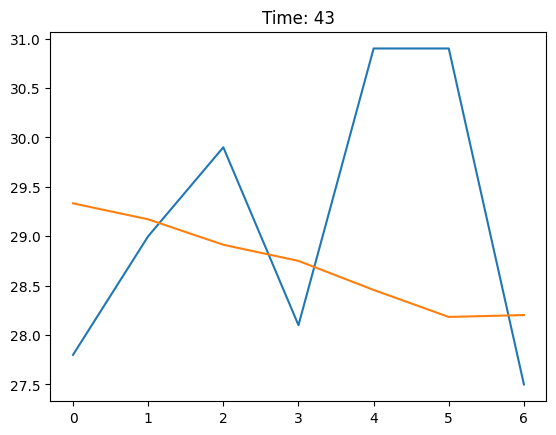

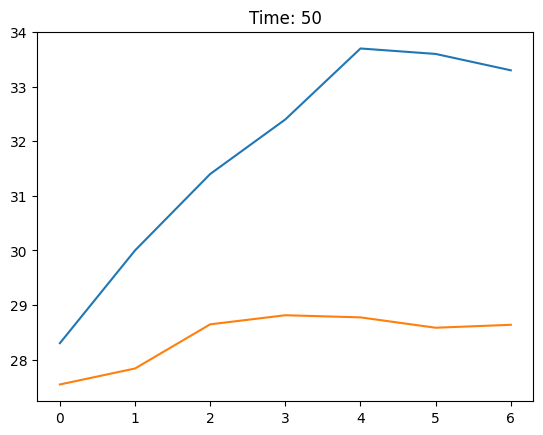

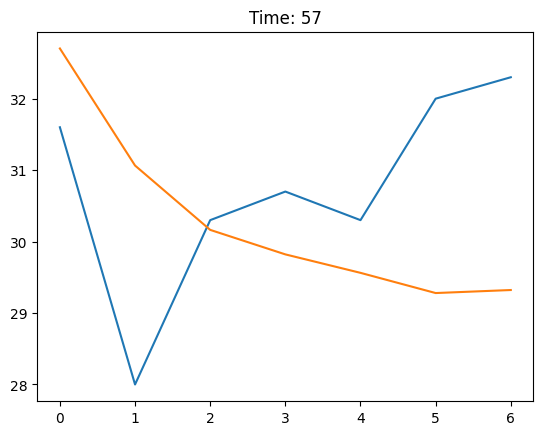

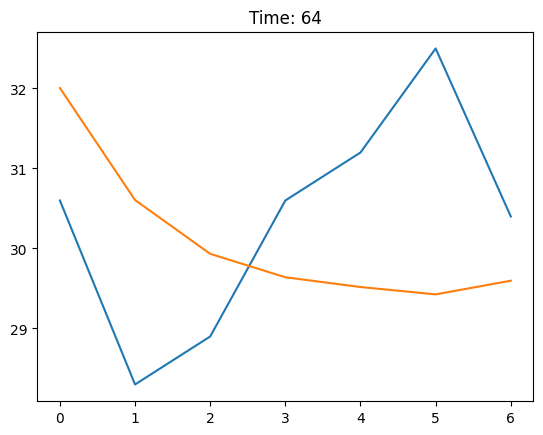

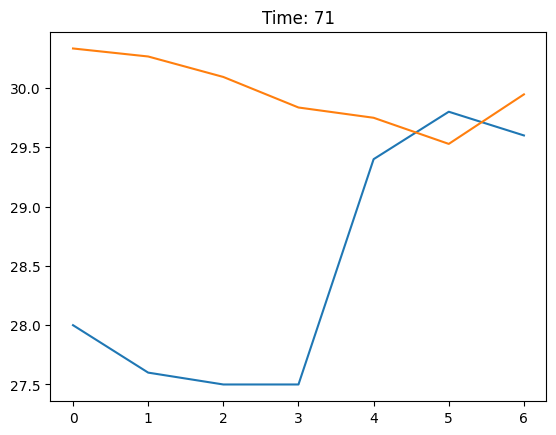

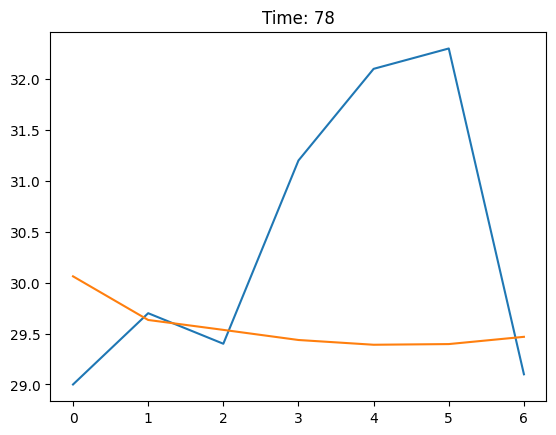

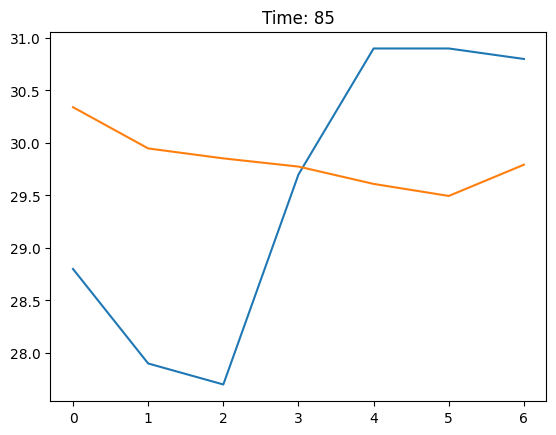

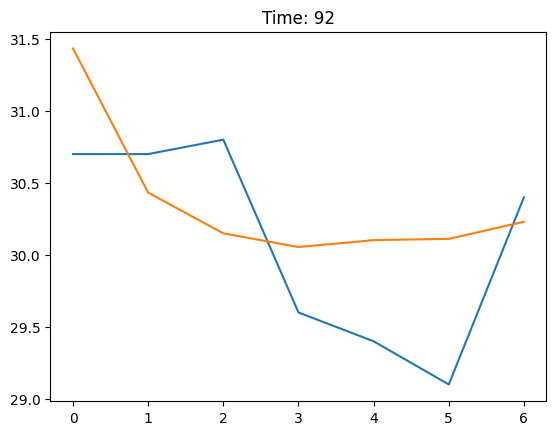

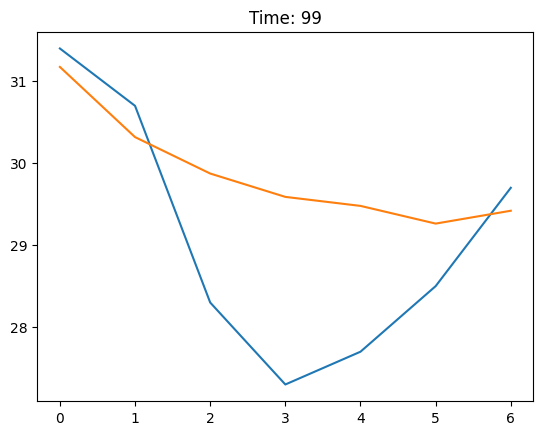

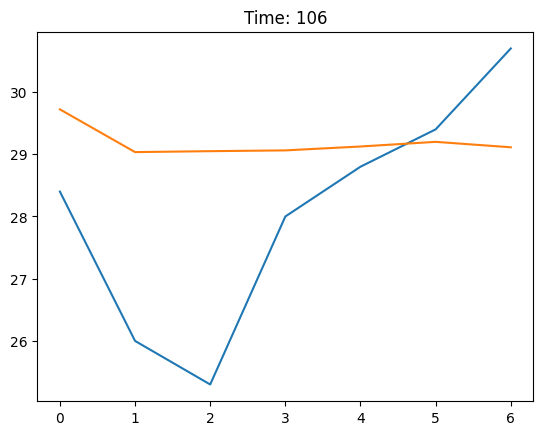

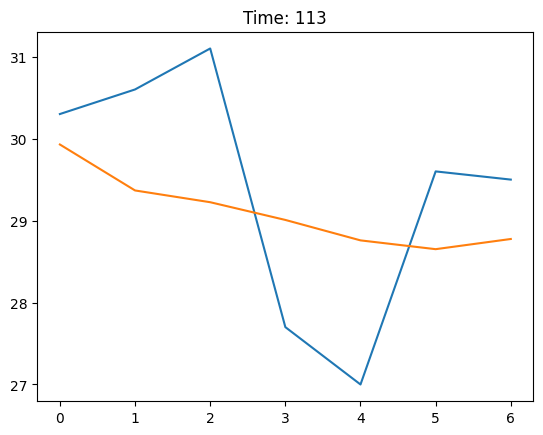

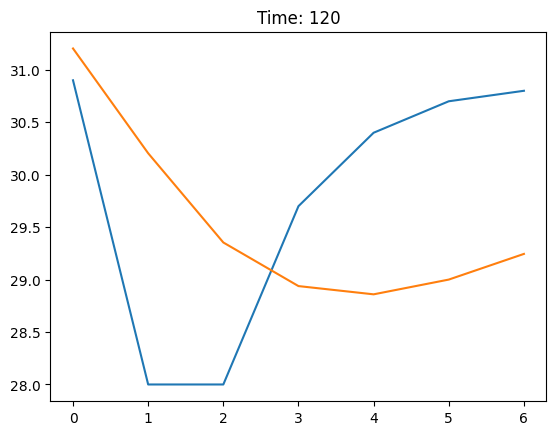

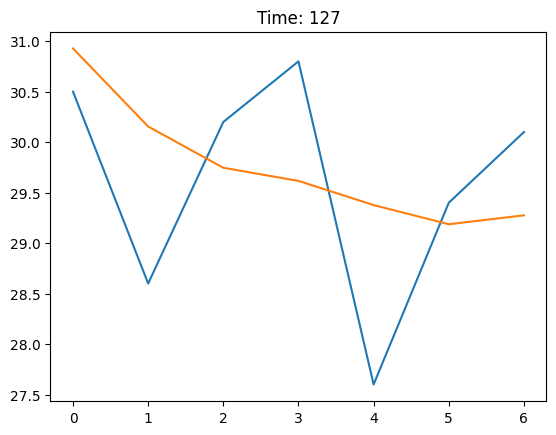

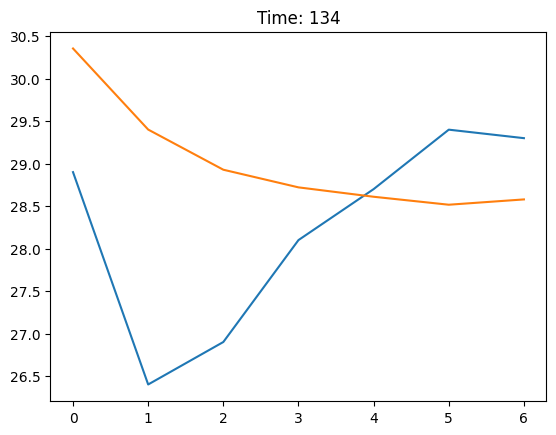

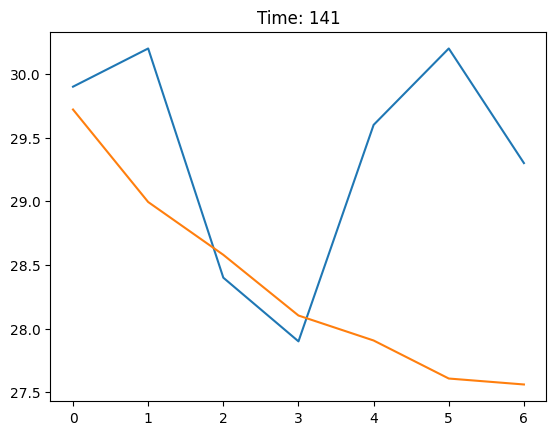

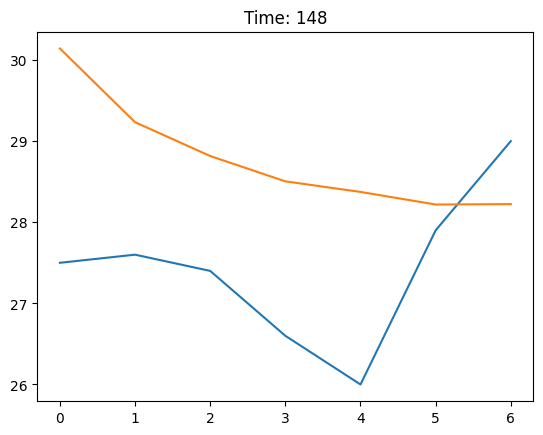

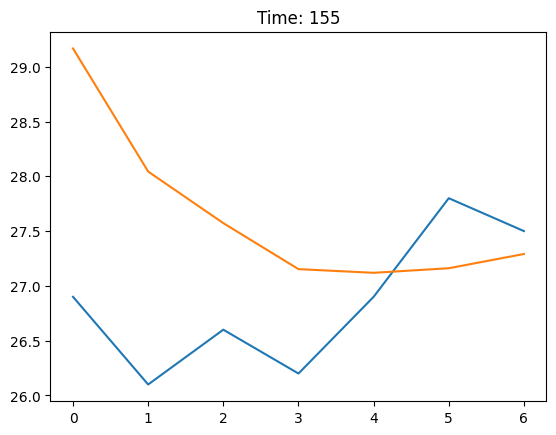

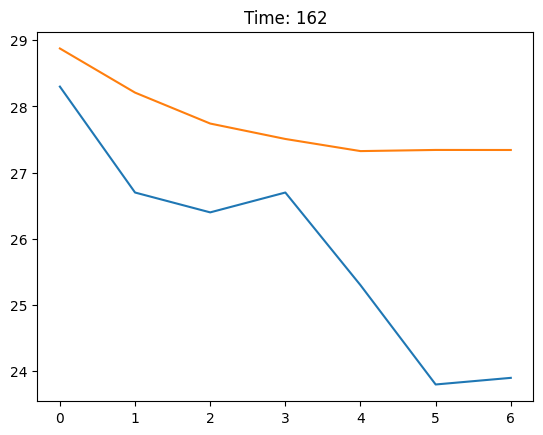

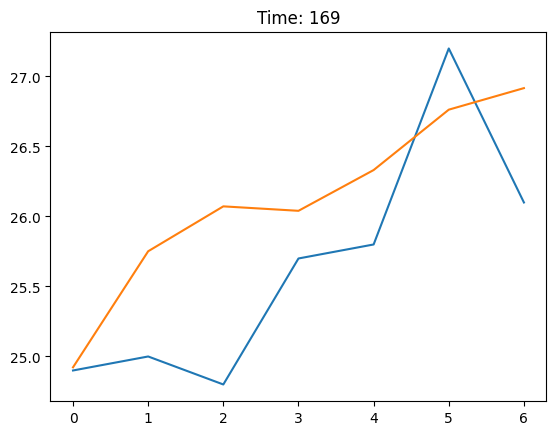

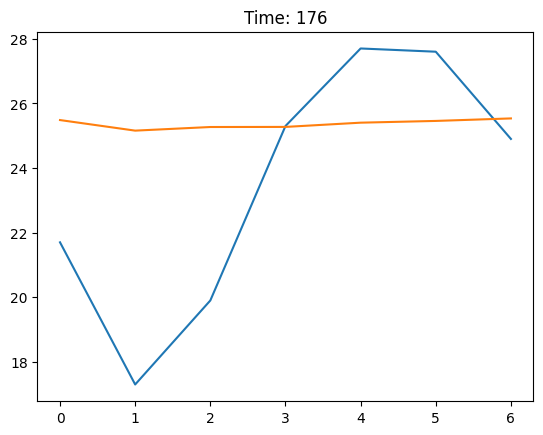

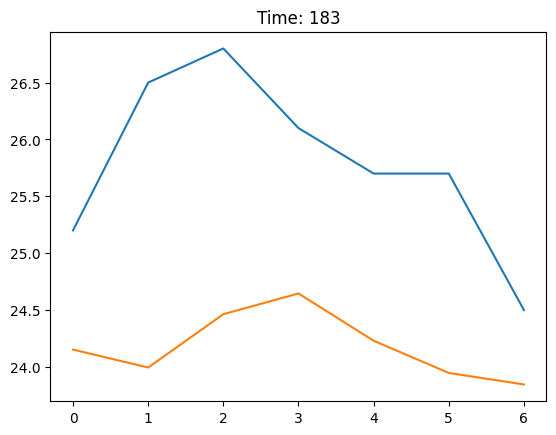

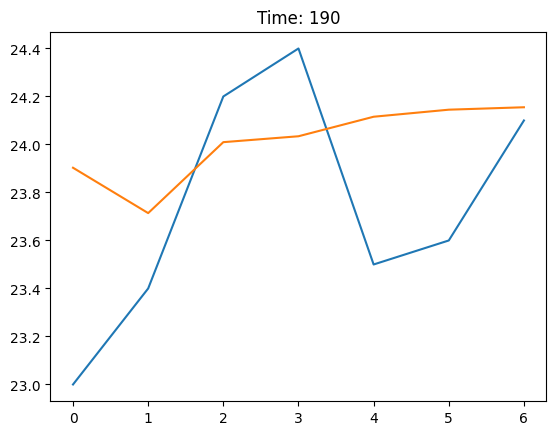

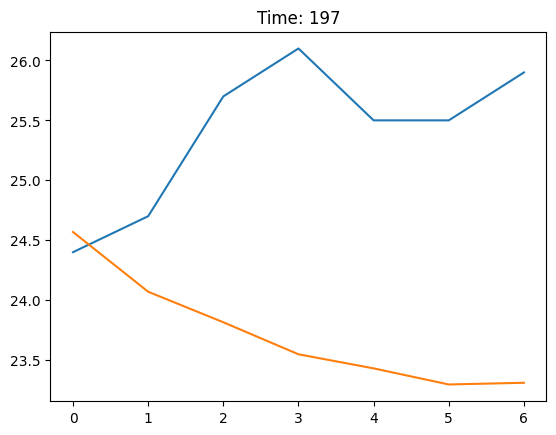

In [154]:
for i in range(out_steps):
    print('Day: ', i+1)
    print('MAE: ', mean_absolute_error(y_test_unnorm[:,i,feature], predict_unnorm[:,i,feature]))
    print('MSE: ', mean_squared_error(y_test_unnorm[:,i,feature], predict_unnorm[:,i,feature]))
    print('CORR: ', np.corrcoef(y_test_unnorm[:,i,feature], predict_unnorm[:,i,feature])[0,1])
for i in range(out_steps):
    plt.title('Day: ' + str(i+1))
    plt.plot(y_test_unnorm[:,i,feature])
    plt.plot(predict_unnorm[:,i,feature])
    plt.legend(['True', 'Predict'])
    plt.show()
for i in range(0, 200, out_steps):
    plt.title('Time: ' + str(i+1))
    plt.plot(y_test_unnorm[i,:,feature])
    plt.plot(predict_unnorm[i,:,feature])
    plt.show()
    

In [60]:
predict = model.predict(X_test_norm)
predict_unnorm = unnormalize(predict, y_train.mean(), y_train.std())
y_test_unnorm = unnormalize(y_test_norm, y_train.mean(), y_train.std())
for i in range(14):
    print('Day: ', i+1)
    print('MAE: ', mean_absolute_error(y_test_unnorm[:,i,0], predict_unnorm[:,i,0]))
    print('MSE: ', mean_squared_error(y_test_unnorm[:,i,0], predict_unnorm[:,i,0]))
    print('CORR: ', np.corrcoef(y_test_unnorm[:,i,0], predict_unnorm[:,i,0])[0,1])
for i in range(14):
    plt.title('Day: ' + str(i+1))
    plt.plot(y_test_unnorm[:,i,0])
    plt.plot(predict_unnorm[:,i,0])
    plt.legend(['True', 'Predict'])
    plt.show()
for i in range(0, 200, 14):
    plt.title('Time: ' + str(i+1))
    plt.plot(y_test_unnorm[i,:,0])
    plt.plot(predict_unnorm[i,:,0])
    plt.show()

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
Day:  1
MAE:  1.1991872546680742
MSE:  2.5220922238475607
CORR:  0.9499375918640894
Day:  2
MAE:  1.662975104913891
MSE:  4.555002420485512
CORR:  0.9082385045910583
Day:  3
MAE:  1.8576092152896513
MSE:  5.602050655492296
CORR:  0.8860264549154626
Day:  4
MAE:  1.9549582414848858
MSE:  6.024363672611226
CORR:  0.8774668261243131
Day:  5
MAE:  2.0106116352947314
MSE:  6.342143321448441
CORR:  0.8706946207310629
Day:  6
MAE:  2.067119338372485
MSE:  6.7229986836824365
CORR:  0.865046908003836
Day:  7
MAE:  2.07987946376188
MSE:  6.857402683923122
CORR:  0.8602580935393919
Day:  8


IndexError: index 7 is out of bounds for axis 1 with size 7